- cloudy ml: https://www.youtube.com/watch?v=fGsl2kMzNPg&t=5125s
- DAX part1: https://www.youtube.com/watch?v=2nMZuWdX9Zw&t=1794s
- DAX part2: https://www.youtube.com/watch?v=dbS8HP-DArY&list=WL&index=210&t=111s

- Complete process: https://youtu.be/G8ikAJele_s?si=r2uGnu8rX_t4uUgc
- liked table formatting: https://youtu.be/vkUXAKqbEjY?si=OJBJK0d9kRQ9BUaA
- Satish Dhawle: https://youtu.be/znJGWMtk_EE?si=T4IEfF0AobiwQgaA

- Dashboard playlist: https://youtube.com/playlist?list=PLO9LeSU_vHCWUvkE1FrGeNxSve7YtJrYl&si=HeOjx_zhoGXDzuhG

# selecting column/s

**Random or alternate column selection:**
- Click on a column name and press `ctrl` key and then click on all columns that you want to select.

**All column:**
- Use shortcut key `ctrl +A`
- Click on first column and then press `shift` key and then click on last column.

In [ ]:
# Handling missing values

## 1. drop missing values rows

1. Select the column Sort the

# Understanding Where the Column is Created

**Power Query (M Language)**
- If you create a new column in Power Query Editor, it will be visible inside Power Query.
- This column is calculated before the data is loaded into the Power BI model.

**DAX Calculated Column in Power BI**
- If you create a new column using DAX (like your formula), it will not appear in Power Query.
- Instead, it is visible only in the Data View and the Report View inside Power BI.


**If You Want to See it in Power Query**
    
If you need the column inside Power Query, you should add it using Power Query instead of DAX:

**Power Query Approach:**
1. Open Power Query Editor (Transform Data).
2. Select the avg talk duration column.
3. Click Add Column → Custom Column.
4. Use the following formula in Power Query (M language): `Duration.TotalMinutes([avg talk duration])`
5. Click OK → Rename the new column as AvgTalkDuration_Minutes.
6. Click Close & Apply.

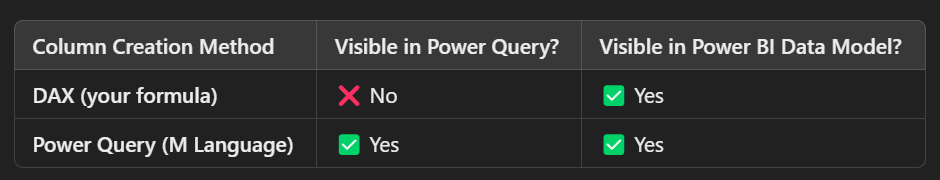

# DAX(Data Analysis Expression) Formula

**Syntax:** `Measure = FORMULA(Parameter)`

- In DAX, when referring to a column, it's best practice to use the table name in single quotes if the table name contains spaces or special characters.
- Example: 'Sales'[Sales Amount]
- If the table name does not have spaces or special characters, quotes are optional.
- Column names must be enclosed in square brackets [Sales Amount].

`Sales Category = IF(Sales[Sales Amount] > 500, "High", "Low")` This will still work, but using single quotes for table names is a good habit to avoid errors in complex DAX expressions.

## Mathematical functions

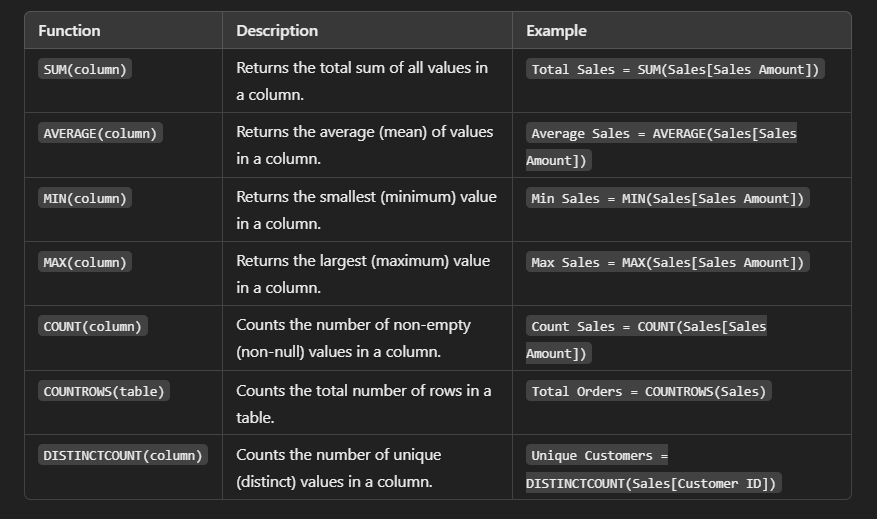

### DISTINCT
The DISTINCT function in DAX is used to return a unique list of values from a column or a table. This is particularly useful when you want to remove duplicates and work with distinct values only.

**Syntax:** `DISTINCT(<column_or_table>)`

- column_or_table → The column or table from which to return unique values.

In [ ]:
UniqueCategories = DISTINCT(Sales[Category])


In [ ]:
# Count Unique Customers
UniqueCustomers = COUNTROWS(DISTINCT(Sales[Customer ID]))


In [ ]:
TotalSalesByUniqueProducts = 
CALCULATE(
    SUM(Sales[Sales]),
    DISTINCT(Sales[Product ID])
)


### VALUES
The VALUES function in DAX returns a unique list of values from a specified column or a single-row table when applied to a table.

**Syntax:** `VALUES(column_or_table)`

- column_or_table – The column or table from which unique values should be returned.

The output depends on where VALUES is used:

- On a column → Returns distinct (unique) values.
- On a table → Returns all rows if there is only one row; otherwise, it behaves like DISTINCT().
- When no data exists → Returns an empty table.
- When used in a measure → Context affects the output.

**How It Works**
- If no filter is applied, VALUES(column) returns all distinct values from the column.

- If filters are applied, VALUES(column) returns only visible (filtered) values.

- If used on a table (VALUES(table)), it returns the filtered table.

- If there are multiple values in a column within a measure or calculated column, it behaves differently compared to SELECTEDVALUE.



In [ ]:
UniqueCategories = VALUES(Products[Category])


In [ ]:
# If VALUES is used in a measure inside a visual, it returns a single value when filtered.

SelectedCategory = VALUES(Products[Category])

In [ ]:
# You can use VALUES inside IF to check if a user selected a single value.

CategoryCheck = 
IF(COUNTROWS(VALUES(Products[Category])) = 1, "Single Category Selected", "Multiple Categories")

- ✔️ To get unique values from a column for slicers or filters.
- ✔️ To check if a single value is selected in measures.
- ✔️ To use inside CALCULATE for conditional filtering.

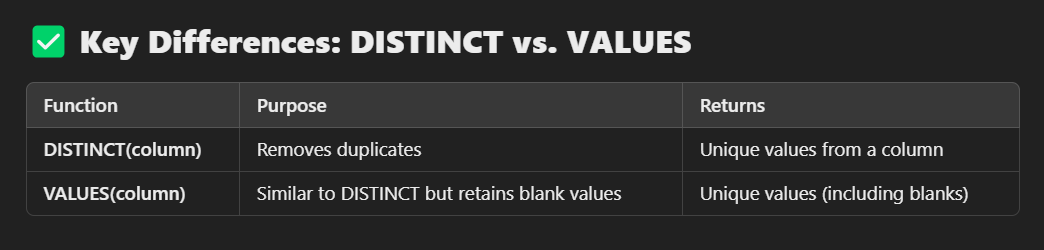

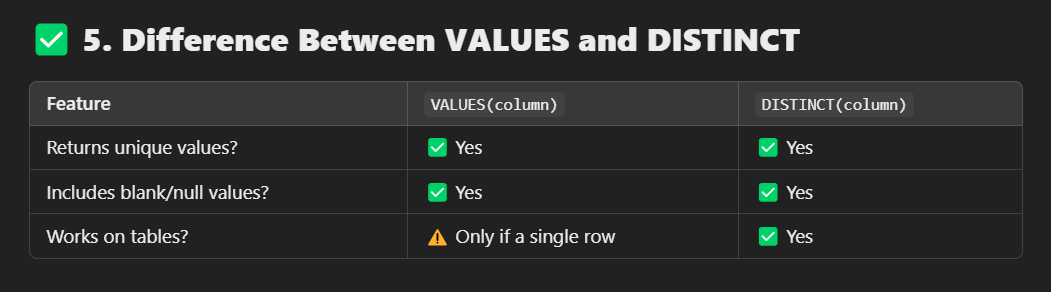

### COUNTA
Counts the number of non-blank (non-empty) values in a specified column. Works on text, numbers, logical values, and dates.

**Syntax:** `COUNTA(column)`


In [ ]:
TotalCustomers = COUNTA(Sales[Customer Name])

### COUNTX
- Iterates over a table and evaluates an expression for each row.
- Counts the number of non-blank results from the expression.
- Unlike COUNTA, it can apply calculations on each row.
    
**Syntax:** `COUNTX(table, expression)`

In [ ]:
TotalValidOrders = COUNTX(Sales, Sales[Amount] * 2)
# If Amount column contains any blank rows, those are ignored.

### COUNTAX
- Similar to COUNTX, but it works on any data type (text, numbers, dates).
- COUNTX mainly works with numeric expressions, whereas COUNTAX works on any expression.

**Syntax:** `COUNTAX(table, expression)`


In [ ]:
TotalNonEmptyCustomers = COUNTAX(Sales, Sales[Customer Name])

# Counts non-blank customer names in the Sales table.
# If Customer Name contains blank values, they will be ignored.

### COUNTBLANK
Counts the number of blank (empty) values in a column.
Works for text, numbers, and date columns.
    
**Syntax:** `COUNTBLANK(column)`


In [ ]:
TotalMissingNames = COUNTBLANK(Sales[Customer Name])
# If Customer Name column has 1 blank value, the result will be 1.

### BLANK
The BLANK() function in DAX (Data Analysis Expressions) is used to return a blank (empty) value. It is often used when handling missing data, NULL values, or replacing values with blank.

**Syntax:** `BLANK()`

In [ ]:
# Handling Missing Data (Replacing with Blank)
SalesStatus = IF(Sales[Amount] = 0, BLANK(), "Valid Sale")

In [ ]:
# Avoiding Division by Zero (Preventing Errors)
ProfitMargin = IF(Sales[Revenue] = 0, BLANK(), Sales[Profit] / Sales[Revenue])

In [ ]:
# Using BLANK() in Measures
TotalDiscount = SUM(Sales[Discount])
# If there are no discounts applied, the result is usually 0, but you can force it to show a blank:
TotalDiscount = IF(SUM(Sales[Discount]) = 0, BLANK(), SUM(Sales[Discount]))


## Logical Functions

### IF 
The IF function evaluates a condition and returns one value if true and another if false.

**Syntax:** `IF(condition, true_value, false_value)`

- condition: A logical test (e.g., Sales[Sales Amount] > 500)
- true_value: The value returned if the condition is TRUE
- false_value: The value returned if the condition is FALSE- 

In [ ]:
# Let's say we want to categorize sales as "High" if above 500 and "Low" otherwise.
Sales Category = IF(Sales[Sales Amount] > 500, "High", "Low")

### SWITCH 
The SWITCH function works like a case statement. It evaluates an expression and returns a corresponding result.

**Syntax:** `SWITCH(expression, value1, result1, value2, result2, ..., else_result)`
- expression: The value to evaluate
- value1, result1: If the expression matches value1, return result1
- else_result: The default result if no match is found


In [ ]:
# Let's classify ship modes based on their names.
Shipping Category = SWITCH(
    Sales[Ship Mode], 
    "Standard Class", "Slow",
    "Second Class", "Moderate",
    "First Class", "Fast",
    "Same Day", "Very Fast",
    "Unknown"
)


### AND 
The AND function checks if both conditions are TRUE.

**Syntax:** `AND(condition1, condition2, condition....n)`

- Returns TRUE if both condition1 and condition2 are TRUE.
- Returns FALSE if any one condition is FALSE.

In [ ]:
# Check if Sales Amount is above 500 AND Discount is less than 10%.
High Profit Sale = IF(AND(Sales[Sales Amount] > 500, Sales[Discount] < 0.10), "Profitable", "Not Profitable")

In [ ]:
# Check if the sales are above 500, the discount is less than 10%, and the region is "East".
High Profit Sale = IF(AND(Sales[Sales Amount] > 500, Sales[Discount] < 0.10, Sales[Region] = "East"), "Profitable", "Not Profitable")

### OR 
The OR function checks if at least one condition is TRUE.

**Syntax:** `OR(condition1, condition2, condition....n)`

- Returns TRUE if any one condition is TRUE.
- Returns FALSE only if both conditions are FALSE.

In [ ]:
# Check if Sales Amount is above 1000 OR the Discount is greater than 15%.
Special Sale = IF(OR(Sales[Sales Amount] > 1000, Sales[Discount] > 0.15), "Yes", "No")

In [ ]:
# Check if the sales are above 1000, the discount is more than 15%, or the region is "North".
Special Sale = IF(OR(Sales[Sales Amount] > 1000, Sales[Discount] > 0.15, Sales[Region] = "North"), "Yes", "No")

### Using && for AND and || for OR
Instead of AND() and OR(), you can also use:

- `&&` → for AND
- `||` → for OR

In [ ]:
High Profit Sale = IF((Sales[Sales Amount] > 500) && (Sales[Discount] < 0.10) && (Sales[Region] = "East"), "Profitable", "Not Profitable")

In [ ]:
Special Sale = IF((Sales[Sales Amount] > 1000) || (Sales[Discount] > 0.15) || (Sales[Region] = "North"), "Yes", "No")

### NOT Function
The NOT function reverses a condition.

- If TRUE, it returns FALSE.
- If FALSE, it returns TRUE.

**Syntax:** `NOT(condition)`

In [ ]:
# Check if a product is NOT a High Sales product.
Not High Sales = IF(NOT(Sales[Sales Amount] > 500), "Low", "High")

## Text Functions

### CONCATENATE
The CONCATENATE function combines two text values into one.
    
**Syntax:** `CONCATENATE(text1, text2)`

- text1: The first text string.
- text2: The second text string.

**🚨 Limitation:** It can only join two strings at a time. If you need to join multiple values, use `&` or `COMBINEVALUES()`.

In [ ]:
# Join First Name and Last Name into a full name.
Full Name = CONCATENATE(Sales[First Name], Sales[Last Name]) # John Doe

### COMBINEVALUES
The COMBINEVALUES() function joins multiple text values with a specified delimiter.

**Syntax:** `COMBINEVALUES(delimiter, column1, column2, column3, ...)`

- delimiter: The character(s) used between values.
- column1, column2, ...: The text columns to combine.


In [ ]:
# Join First Name, Last Name, and City with a comma.
Full Info = COMBINEVALUES(", ", Sales[First Name], Sales[Last Name], Sales[City]) # John, Doe, New York

**Why use COMBINEVALUES()?**

- More efficient than & for large datasets.
- Handles BLANK() values better.

### LEFT
The LEFT() function returns the first N characters from a text.

**Syntax:** `LEFT(text, number_of_chars)`

- text: The string to extract from.
- number_of_chars: The number of characters to extract from the left.

In [ ]:
# Get the first 3 characters of Product Code.
Product Prefix = LEFT(Sales[Product Code], 3) # "ABC123" → "ABC"

### RIGHT
The RIGHT() function returns the last N characters from a text.

**Syntax:** `RIGHT(text, number_of_chars)`

- text: The string to extract from.
- number_of_chars: The number of characters to extract from the right.

In [ ]:
# Get the last 4 characters of Order ID.
Order Suffix = RIGHT(Sales[Order ID], 4) # "ORD4567" → "4567"

### MID
The MID() function extracts text from the middle of a string, starting at a specific position.
    
**Syntax:** `MID(text, start_position, number_of_chars)`

- text: The string to extract from.
- start_position: The starting position (1-based index).
- number_of_chars: The number of characters to extract.

In [ ]:
# Extract characters 3 to 6 from Order Code.
Order Extract = MID(Sales[Order Code], 3, 4) # "AB12345X" → "1234"

### SEARCH
The SEARCH() function returns the position of a substring within a text.

**Syntax:** `SEARCH(find_text, within_text, start_position, not_found_value)`

- find_text: The text to search for.
- within_text: The text where the search happens.
- start_position (optional): The position to start searching (default = 1).
- not_found_value (optional): The value to return if find_text is not found (default = error).

In [ ]:
# Find the position of "-" in Product Code.
Dash Position = SEARCH("-", Sales[Product Code], 1, -1) # "ABC-123" → 4

### SUBSTITUTE
The SUBSTITUTE() function replaces all occurrences of a substring with a new text.

**Syntax:** `SUBSTITUTE(text, old_text, new_text)`

- text: The original string.
- old_text: The text to replace.
- new_text: The replacement text.

In [ ]:
# Replace "OLD" with "NEW" in Product Name.
Updated Product = SUBSTITUTE(Sales[Product Name], "OLD", "NEW") # "OLD-Model A" → "NEW-Model A"

### FORMAT
The FORMAT() function in DAX is used to convert a value into a formatted text string using a specified format pattern.

**Syntax:** `FORMAT(value, format_string)`

- value: The number, date, or other value to format.
- format_string: The format pattern (like "DD-MMM-YYYY", "Currency", etc.).

**Returns:** A text string with the formatted value.

#### Formatting Numbers

In [ ]:
Formatted Sales = FORMAT(Sales[Total Sales], "0.00") # "2500.50" (If Total Sales is 2500.5)

In [ ]:
Sales Currency = FORMAT(Sales[Total Sales], "₹#,##0.00") # "₹2,500.50" (For Indian Rupees)

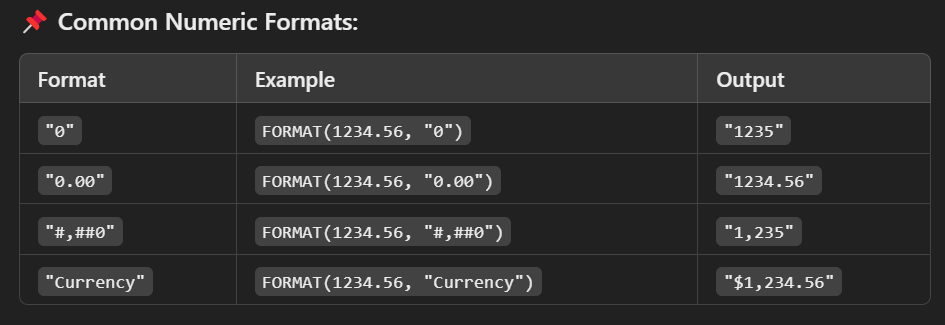

#### Formatting Dates

In [ ]:
Formatted Date = FORMAT(Orders[Order Date], "DD-MMM-YYYY") # "05-Mar-2025"

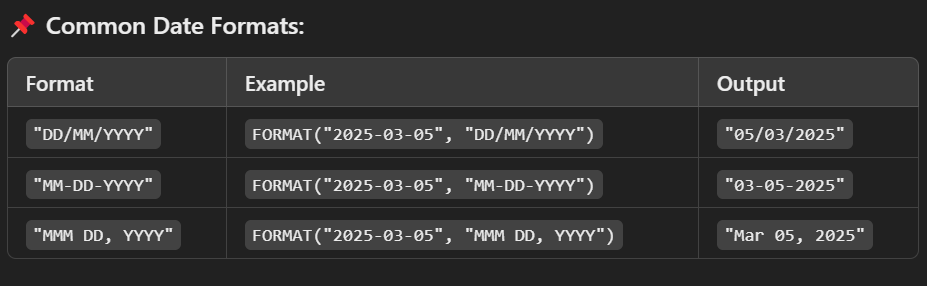

#### Formatting Time

In [ ]:
Formatted Time = FORMAT(NOW(), "HH:MM AM/PM") # "02:30 PM"

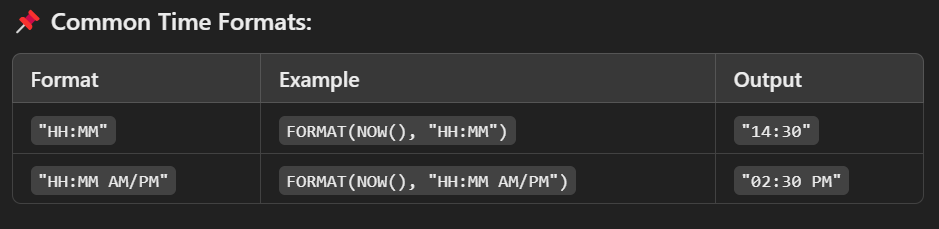

#### Formatting Percentages

In [ ]:
Profit Percentage = FORMAT(Sales[Profit] / Sales[Total Sales], "0.00%") # "12.50%" (If the division result is 0.125)

## Date & Time Functions

### TODAY
The TODAY() function returns the current system date without the time.
    
**Syntax:** `TODAY()`

In [ ]:
Current Date = TODAY() # 2025-03-05

### NOW
The NOW() function returns the current system date and time.

**Syntax:** NOW()``



In [ ]:
Current DateTime = NOW() # 2025-03-05 14:30:25

### DATE
Creates a date value using specified year, month, and day.

**Syntax:** `DATE(Year, Month, Day)`

In [ ]:
DATE(2024, 3, 22) # 22-Mar-2024

### YEAR
The YEAR() function extracts the year from a date.

**Syntax:** `YEAR(date)`

- date: A date column or value.

In [ ]:
Order Year = YEAR(Sales[Order Date]) # 2024

### MONTH
The MONTH() function extracts the month from a date.

**Syntax:** `MONTH(date)`

- date: A date column or value.

In [ ]:
Order Month = MONTH(Sales[Order Date]) # 3 (for March)

# Note: Returns a number between 1 (Jan) to 12 (Dec).

### DAY
The DAY() function extracts the day from a date.

**Syntax:** `DAY(date)`

- date: A date column or value.

In [ ]:
Order Day = DAY(Sales[Order Date]) # 15

### EOMONTH
The EOMONTH() function returns the end of the month for a given date, with an optional offset.

**Syntax:** `EOMONTH(start_date, months)`

- start_date: The reference date.
- months: Number of months to move forward/backward (use 0 for the same month).

In [ ]:
End of Month = EOMONTH(TODAY(), 0) # 2025-03-31

In [ ]:
# Find the last date of the next month.
Next Month End = EOMONTH(TODAY(), 1) # 2025-04-30

# Use Cases: Used for month-end reporting, rolling months calculation, etc.

### DATEDIFF
The DATEDIFF() function calculates the difference between two dates in days, months, or years.

**Syntax:** `DATEDIFF(start_date, end_date, unit)`

- start_date: The starting date.
- end_date: The ending date.
- unit: The difference type (DAY, MONTH, YEAR, HOUR, MINUTE, etc.).

In [ ]:
# Find the number of days between the order and delivery date.
Days Between = DATEDIFF(Sales[Order Date], Sales[Delivery Date], DAY) # 5


In [ ]:
# Find the years between two dates.
Age = DATEDIFF(Customer[Birth Date], TODAY(), YEAR) # 28

# Use Cases: Used for aging reports, tenure calculations, and date-based comparisons.

### WEEKDAY
The WEEKDAY() function returns the day number of the week.
    
**Syntax:** `WEEKDAY(date, return_type)`

- date: A date column or value.
- return_type (optional): Determines the numbering system:
    - 1 (default) → Sunday = 1, Monday = 2, … Saturday = 7
    - 2 → Monday = 1, Tuesday = 2, … Sunday = 7
    - 3 → Monday = 0, Tuesday = 1, … Sunday = 6

In [ ]:
# Find the weekday number of an order date.
Order Weekday = WEEKDAY(Sales[Order Date], 2) # 3

# Use Cases: Used for weekend/weekday calculations, filtering business days, etc..

### CALENDAR

In [ ]:
# create a new calendar table
Calendar_Table = CALENDAR ("2023-1-1", "2024-12-31") 

In [ ]:
Calendar_Table = CALENDAR(MIN(Sales[Order Date]), MAX(Sales[Order Date]))

### MTD, QTD, YTD
MTD, QTD, and YTD are time intelligence functions in DAX that help you calculate cumulative values over time. They aggregate your data from the beginning of a period (month, quarter, or year) up to the current date within that period. Here's a detailed explanation of each along with their syntax and examples.

1. Month-To-Date (MTD) calculates the cumulative total from the start of the current month up to the current date in the filter context.
2. Quarter-To-Date (QTD) calculates the cumulative total from the start of the current quarter up to the current date.
3. Year-To-Date (YTD) calculates the cumulative total from the start of the current year up to the current date.

**Syntax:** 
- `TOTALMTD(<expression>, <dates>, [filter])`
- `TOTALQTD(<expression>, <dates>, [filter])`
- `TOTALYTD(<expression>, <dates>, [filter], [year_end_date])`

    - expression: A measure or expression (often an aggregation like SUM(Sales[Total Sales])).
    - dates: A column or expression that represents dates (usually from a dedicated date/calendar table).
    - filter (optional): Additional filters to apply when calculating the measure.
    - year_end_date (optional): If your fiscal year doesn't end on December 31, you can specify a different year-end date.

In [ ]:
# Assuming you have a Sales table and a Calendar table, you can create a measure for Month-To-Date Sales as:
Sales MTD = TOTALMTD(SUM(Sales[Total Sales]), 'Calendar'[Date])

In [ ]:
Sales QTD = TOTALQTD(SUM(Sales[Total Sales]), 'Calendar'[Date])

In [ ]:
Sales YTD = TOTALYTD(SUM(Sales[Total Sales]), 'Calendar'[Date])

## Filter & Conditional Functions

### FILTER
Returns a table containing only the rows that meet a specified condition.

**Syntax:** `FILTER(<table>, <condition>)`

- table: The table to filter.
- condition: A logical expression to apply as a filter.

In [ ]:
# Find sales where the total sales amount is greater than 1000.
High Sales = FILTER(Sales, Sales[Total Sales] > 1000)

# Usage: This is useful when combined with functions like SUMX or CALCULATE.

### ALL
Removes all filters from a specified table or column.


**Syntax:** `ALL(<table_or_column>)`

- table_or_column: The table or column from which to remove filters.

In [ ]:
# Calculate total sales ignoring all filters.
Total Sales (Ignore Filters) = CALCULATE(SUM(Sales[Total Sales]), ALL(Sales))

# Usage: This helps in calculating grand totals or creating percentages by removing filters.

### ALLSELECTED
Removes filters only outside the current selection, keeping filters applied in the visual.


**Syntax:** `ALLSELECTED(<table_or_column>)`

- table_or_column: The table or column from which to remove external filters.

In [ ]:
# Calculate total sales considering only filters applied inside the current visual.
Total Sales (Selected) = CALCULATE(SUM(Sales[Total Sales]), ALLSELECTED(Sales))

# Usage: It is useful when creating measures for percentage of total calculations within selected filters.

### REMOVEFILTERS
Removes all filters from a table or column, similar to ALL(), but can be applied inside functions like CALCULATE.

**Syntax:** `REMOVEFILTERS(<table_or_column>)`

- table_or_column: The table or column from which to remove filters.

In [ ]:
# Calculate total sales removing all filters.
Total Sales (No Filters) = CALCULATE(SUM(Sales[Total Sales]), REMOVEFILTERS(Sales))

# Usage: It is functionally similar to ALL() but more explicit when used within calculations.

### KEEPFILTERS
Modifies filter context by keeping existing filters while applying additional ones.


**Syntax:** `KEEPFILTERS(<expression>)`

- expression: The DAX formula where filters are to be kept.

In [ ]:
# Calculate total sales for Category = "Electronics" while keeping existing filters.

Electronics Sales = 
CALCULATE(
    SUM(Sales[Total Sales]), 
    KEEPFILTERS(Sales[Category] = "Electronics")
)

# Usage: It ensures that existing filters are not overridden when applying new conditions.

### Examples:

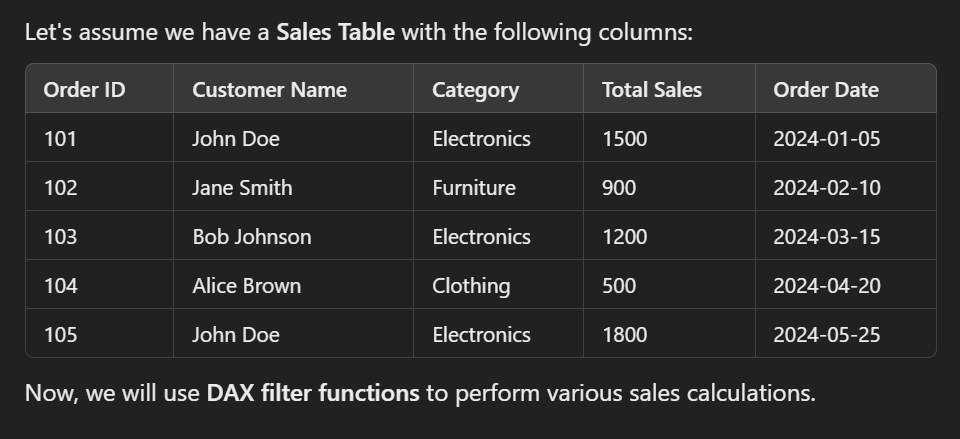

**1. We want to find the total sales where the amount is greater than 1000**

In [ ]:
High Sales Total = 
CALCULATE(
    SUM(Sales[Total Sales]), 
    FILTER(Sales, Sales[Total Sales] > 1000)
)


**2. We want to calculate total sales ignoring all filters applied in reports**

In [ ]:
Total Sales (Ignore Filters) = 
CALCULATE(
    SUM(Sales[Total Sales]), 
    ALL(Sales) # Removes any filters applied in visuals or slicers.
)


**3. If users select a specific date range or category in a visual, we want to show total sales based only on that selection**

In [ ]:
Total Sales (Selected) = 
CALCULATE(
    SUM(Sales[Total Sales]), 
    ALLSELECTED(Sales) # Keeps only filters applied inside the visual.
)

# If a user selects only Electronics category, this formula ensures the total is based only on that selection.

**4. We want to show total sales without category filtering, even if users apply a category filter**

In [ ]:
Total Sales (No Category Filter) = 
CALCULATE(
    SUM(Sales[Total Sales]), 
    REMOVEFILTERS(Sales[Category]) # Ensures that category filters do not affect the calculation.
)

# If a user selects only "Furniture," this formula ignores the selection and shows the full total.

**5. We want to keep existing filters while adding a new one (e.g., showing sales for Electronics only, while keeping date filters)**

In [ ]:
Electronics Sales (Keep Filters) = 
CALCULATE(
    SUM(Sales[Total Sales]), 
    KEEPFILTERS(Sales[Category] = "Electronics") # Keeps any existing filters (e.g., date filter) while ensuring only Electronics sales are included.
)

# If a user filters the report to January, this formula ensures that it keeps the January filter and applies Electronics filter on top.

In many real-world Power BI reports, we need to calculate the percentage of total sales based on applied filters. We'll use DAX filter functions to ensure our percentage calculations remain dynamic.

**We will calculate the percentage of total sales per category**

In [ ]:
# 1️⃣ Calculate Total Sales (Dynamic)
# First, we calculate the total sales respecting applied filters.

Total Sales = SUM(Sales[Total Sales])

# 2️⃣ Calculate Grand Total (Ignoring Filters)
# To get the total sales across all categories (ignoring filters), we use ALL().

Grand Total Sales = 
CALCULATE(
    SUM(Sales[Total Sales]), 
    ALL(Sales) # Removes any filters applied (like category selection in visuals).
)

# 3️⃣ Calculate Sales Percentage per Category
# Now, we calculate the percentage contribution of each category to total sales.

Sales % = 
DIVIDE( # DIVIDE(numerator, denominator, alternate_result)
    [Total Sales], 
    [Grand Total Sales], 
    0
)


# Calculate Sales % Within Selected Filters
# If the user selects a date range or category in a visual slicer, we use ALLSELECTED() to ensure the percentage calculation is based only on the selected data.
Sales % (Selected) = 
DIVIDE(
    [Total Sales], 
    CALCULATE(
        SUM(Sales[Total Sales]), 
        ALLSELECTED(Sales) # Keeps only filters applied by the user in the report.
    ), 
    0
)


## Time Intelligence Functions

Time Intelligence functions allow us to analyze data over different time periods (Year-to-Date, Quarter-to-Date, Month-to-Date, and Previous Periods). These functions are widely used in financial reports, trend analysis, and cumulative calculations.

### DATESYTD
Returns all dates from the start of the year to the selected date.
    
**Syntax:** `DATESYTD(dates_column, [year_end_date])`

In [ ]:
Sales YTD = 
CALCULATE(
    SUM(Sales[Total Sales]), 
    DATESYTD(Sales[Order Date])
)


### DATESQTD
Returns all dates from the start of the quarter to the selected date.

**Syntax:** `DATESQTD(<dates_column>)`



In [ ]:
Sales QTD = 
CALCULATE(
    SUM(Sales[Total Sales]), 
    DATESQTD(Sales[Order Date])
)


### DATESMTD
Returns all dates from the start of the month to the selected date.

**Syntax:** `DATESMTD(<dates_column>)`



In [ ]:
Sales MTD = 
CALCULATE(
    SUM(Sales[Total Sales]), 
    DATESMTD(Sales[Order Date])
)


### PREVIOUSYEAR
Returns all dates from the same period last year.

**Syntax:** `PREVIOUSYEAR(dates_column)`



In [ ]:
Sales Last Year = 
CALCULATE(
    SUM(Sales[Total Sales]), 
    PREVIOUSYEAR(Sales[Order Date])
)

# Returns total sales for the previous year. 

### PREVIOUSMONTH
Returns all dates from the previous month.

**Syntax:** `PREVIOUSMONTH(dates_column)`



In [ ]:
Sales Last Month = 
CALCULATE(
    SUM(Sales[Total Sales]), 
    PREVIOUSMONTH(Sales[Order Date])
)

# Returns sales for the last month.

### PREVIOUSDAY
Returns all dates from the previous day.

**Syntax:** `PREVIOUSDAY(dates_column)`



In [ ]:
Sales Yesterday = 
CALCULATE(
    SUM(Sales[Total Sales]), 
    PREVIOUSDAY(Sales[Order Date])
)

# Returns sales for the previous day.

## Ranking & Statistical Functions
These functions help in ranking, calculating percentiles, and finding the median in datasets. They are useful in scenarios like leaderboards, percentile analysis, and statistical insights in Power BI.

### RANKX
Ranks values based on a measure

**Syntax:** `RANKX(table, expression, [value], [order], [ties])`

- table: The table or dataset to rank values within.
- expression: The measure or column used for ranking (e.g., SUM(Sales[Total Sales])).
- [value]: (Optional) The specific value to rank (usually ignored).
- [order]: DESC for highest value first (default), ASC for lowest value first.
- [ties]: Dense (ranks consecutively) or Skip (skips ranks for ties).

In [ ]:
Product Rank = 
RANKX(
    ALL(Sales[Product Name]),   # -- Table to rank within
    SUM(Sales[Total Sales]),    # -- Measure to rank
    ,                           # -- Ignoring specific value
    DESC,                       # -- Rank in descending order
    DENSE                       # -- Use dense ranking
)

# The highest-selling product gets rank 1.
# If two products have the same sales, they get the same rank (dense ranking).


### PERCENTILE.INC
Finds percentile including min/max

**Syntax:** `PERCENTILE.INC(column, percentile)`

- column: The column with numeric values.
- percentile: A value between 0 and 1 representing the desired percentile.

In [ ]:
90th Percentile Sales = 
PERCENTILE.INC(Sales[Total Sales], 0.90)

# This finds the sales value at or above which 10% of the data points fall.

### PERCENTILE.EXC
Finds percentile excluding min/max

**Syntax:** `PERCENTILE.EXC(column, percentile)`


In [ ]:
25th Percentile Sales = 
PERCENTILE.EXC(Sales[Total Sales], 0.25)


- PERCENTILE.INC() includes all values.
- PERCENTILE.EXC() ignores min/max values, giving slightly different results.

### MEDIAN
Finds the middle value of a column

**Syntax:** `MEDIAN(column)`



In [ ]:
Median Sales = MEDIAN(Sales[Total Sales])

## Relationships & Lookup Functions
These functions fetch related data from other tables based on established relationships. They are useful for data modeling, lookup operations, and table navigation in Power BI.

### RELATED
- Fetches a single value from a related table using an existing relationship.
- Works in one-to-many (1:M) or many-to-one (M:1) relationships.

**Syntax:** `RELATED(<ColumnName>)`

- ColumnName: The column from the related table that you want to retrieve.

Example: We have two tables:
- 🔹 Sales table with Order ID, Product ID, Sales Amount.
- 🔹 Products table with Product ID, Product Name, Category.

In [ ]:
# Retrieve the Product Name in the Sales table:
Product Name = RELATED(Products[Product Name])

# Power BI looks up Product Name from the Products table.
# Works only if a relationship exists between Sales[Product ID] and Products[Product ID].

### RELATEDTABLE
- Returns a filtered table containing related rows from a table using a one-to-many (1:M) relationship.
- Works in the opposite direction of RELATED().

**Syntax:** `RELATEDTABLE(<TableName>)`

- TableName: The table that contains related rows.

Example: We have two tables:
- 🔹 Customers table (Customer ID, Customer Name).
- 🔹 Orders table (Order ID, Customer ID, Order Amount).

In [ ]:
# Retrieve orders for a customer:
Customer Orders = COUNTROWS(RELATEDTABLE(Orders))

# For each customer in the Customers table, it counts related orders from Orders.
# Works from parent (Customers) to child (Orders).

### LOOKUPVALUE
- Retrieves a single value from a column without needing a relationship.
- Similar to VLOOKUP in Excel.
- Supports multiple conditions.

**Syntax:** `LOOKUPVALUE(<ResultColumn>, <SearchColumn>, <SearchValue>, [<SearchColumn2>, <SearchValue2>], ...)`

- ResultColumn: The column from which the value will be returned.
- SearchColumn: The column where the function looks for the search value.
- SearchValue: The value to find in the search column.
- SearchColumn2, SearchValue2: (Optional) Additional conditions to match.



In [ ]:
# Find Product Category Based on Product ID
Product Category = LOOKUPVALUE(Products[Category], Products[Product ID], Sales[Product ID])

# Finds the Category in Products where Product ID in Products matches Sales[Product ID].
# Works like a VLOOKUP in Excel.

In [ ]:
# Find Employee Salary Based on Multiple Conditions
Employee Salary = LOOKUPVALUE(
    Employees[Salary], 
    Employees[Employee Name], "John Doe", 
    Employees[Department], "Finance"
)

# Finds Salary where Employee Name = "John Doe" and Department = "Finance".

- ✔ RELATED: Fetches a single value when a relationship exists.
- ✔ RELATEDTABLE: Retrieves a filtered table when a relationship exists.
- ✔ LOOKUPVALUE: Finds a specific value without needing a relationship.

## CALCULATE & Context Modification

### CALCULATE
The CALCULATE() function modifies the filter context of a measure or calculation. It evaluates an expression under the modified filter conditions.

**Syntax:** `CALCULATE(expression, filter1, filter2, ...)`

- expression → The calculation to perform.
- filter1, filter2, ... → Optional filters applied to modify context.

In [ ]:
# Find total sales only for the "Electronics" category.
Electronics Sales = CALCULATE(SUM(Sales[Sales Amount]), Products[Category] = "Electronics")

### CALCULATETABLE
The CALCULATETABLE() function returns a modified table based on applied filters.

**Syntax:** `CALCULATETABLE(table, filter1, filter2, ...)`

- table → The table to modify.
- filter1, filter2, ... → Filters applied to modify context.

In [ ]:
# Return a table containing only orders from Electronics.
Electronics Sales Table = CALCULATETABLE(Sales, Products[Category] = "Electronics")

### USERELATIONSHIP
By default, Power BI only uses one active relationship between tables.
If there is a second inactive relationship, USERELATIONSHIP() can be used to activate it for a specific calculation.

**Syntax:** `USERELATIONSHIP(column1, column2)`

- column1, column2 → The columns forming the inactive relationship.

Example:

We have `Sales` and `Calendar` table and a retail company wants to analyze sales based on two different dates:

1. Order Date (when the customer placed the order)
2. Ship Date (when the product was actually shipped)

**📌 Problem:**
- The Sales table contains both Order Date and Ship Date, but only one active relationship can exist with the Calendar table at a time.
- By default, Power BI uses the active relationship, which is Sales[Order Date] → Calendar[Date].
- However, to analyze sales based on the Ship Date, we need to use the inactive relationship.

In [ ]:
Total Sales = SUM(Sales[Sales Amount]) # This works based on the active relationship (Order Date)

Sales by Ship Date = 
CALCULATE(
    SUM(Sales[Sales Amount]), 
    USERELATIONSHIP(Sales[Ship Date], Calendar[Date])
)
# This measure forces Power BI to use the inactive Ship Date relationship.

### CROSSFILTER 
CROSSFILTER() changes the direction of the relationship between two tables.

**Syntax:** `CROSSFILTER(column1, column2, direction)`

- column1, column2 → The columns forming the relationship.
- direction → Can be "None", "OneWay", or "Both".

Example:

A company has a `Sales` Table and a `Customers` Table, linked by `Customer ID`.
By default, relationships in Power BI are single-directional (from Customers → Sales).
However, in some cases, we need a bidirectional relationship to analyze data dynamically.

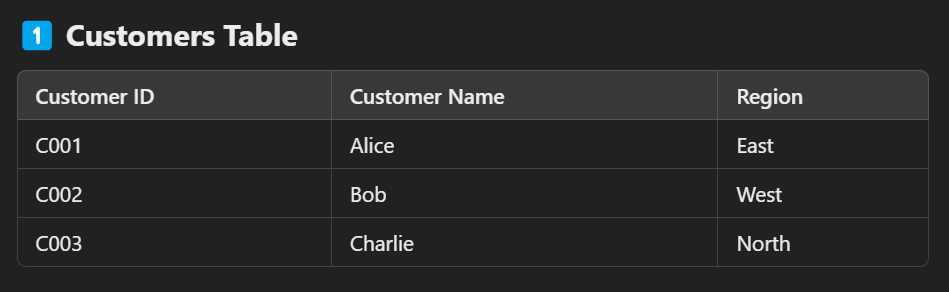

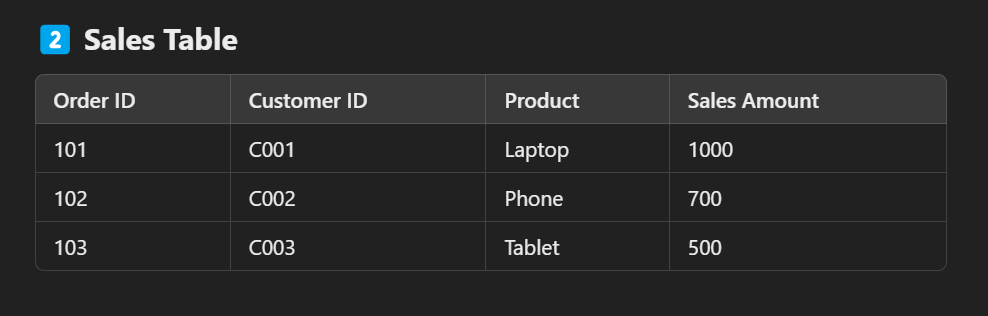

- The Customers Table (One) → Sales Table (Many) relationship is single-directional.
- This means we can filter Sales by Customers, but we cannot filter Customers by Sales.

**💡 Problem:**
If we create a report showing regions with no sales, the default setup won’t work because Power BI doesn’t filter Customers based on Sales.

To analyze sales while also filtering customers dynamically, we use CROSSFILTER.

In [ ]:
Total Sales (Bidirectional) = 
CALCULATE(
    SUM(Sales[Sales Amount]), 
    CROSSFILTER(Customers[Customer ID], Sales[Customer ID], BOTH)
)
# This forces bidirectional filtering, allowing customers to be filtered based on sales.



## Iterators (Row-by-Row Operations)
Iterator functions (X functions) work row by row in a table, performing calculations on each row and then aggregating the results.

### SUMX
Returns the sum of an expression evaluated row by row over a table.

**Syntax:** `SUMX(table, expression)`

- table → The table in which the expression will be evaluated.
- expression → The calculation performed for each row.

In [ ]:
Total Revenue = SUMX(Sales, Sales[Quantity] * Sales[Price])

# Multiplies Quantity and Price for each row.
# Then sums up the total for all rows.

### AVERAGEX
- Calculates the average of an expression evaluated row by row.
- Works like SUMX, but returns an average instead of a sum.

**Syntax:** `AVERAGEX(table, expression)`



In [ ]:
Avg Order Value = AVERAGEX(Sales, Sales[Quantity] * Sales[Price])

# Calculates Revenue for each order.
# Averages the Revenue across all orders.

### MINX
- Finds the minimum value of an expression evaluated row by row.
- Evaluates each row, returns the smallest value.

**Syntax:** `MINX(table, expression)`

In [ ]:
Min Order Revenue = MINX(Sales, Sales[Quantity] * Sales[Price])

### MAXX
- Finds the maximum value of an expression evaluated row by row.
- Evaluates each row, returns the largest value.

**Syntax:** `MAXX(table, expression)`



In [ ]:
Max Order Revenue = MAXX(Sales, Sales[Quantity] * Sales[Price])

### OUNTX
- Counts the number of rows where an expression evaluates to a non-blank value.
- Counts rows where expression is not blank.- 

**Syntax:** `COUNTX(table, expression)`



In [ ]:
Count High Sales = COUNTX(Sales, IF(Sales[Quantity] * Sales[Price] > 1000, 1, BLANK()))

## Advanced Time Intelligence Functions
These Time Intelligence functions help analyze date-based data, such as comparisons between different time periods.

### DATESBETWEEN
Returns a table with dates within a specified range.


**Syntax:** `DATESBETWEEN(dates_column, start_date, end_date)`

- dates_column → A column containing dates.
- start_date → The start of the range.
- end_date → The end of the range.

In [ ]:
Sales Last 30 Days = 
CALCULATE(
    SUM(Sales[Total Sales]), 
    DATESBETWEEN(Sales[Order Date], TODAY() - 30, TODAY())
)


**📌 Use Case:** A sales manager wants to track total revenue between two specific dates, e.g., sales from Jan 1, 2024, to Jan 31, 2024.

In [ ]:
Sales in January 2024 = 
CALCULATE(
    SUM(Sales[Total Sales]), 
    DATESBETWEEN(Sales[Order Date], DATE(2024,1,1), DATE(2024,1,31))
)


### PARALLELPERIOD
Shifts a date column by a given number of intervals (e.g., month, quarter, year).


**Syntax:** `PARALLELPERIOD(dates_column, number_of_intervals, interval)`

- dates_column → A column containing dates.
- number_of_intervals → How many periods to shift (+/- values).
- interval → DAY, MONTH, QUARTER, YEAR.

In [ ]:
Sales Last Month = 
CALCULATE(
    SUM(Sales[Total Sales]), 
    PARALLELPERIOD(Sales[Order Date], -1, MONTH)
)


**📌 Use Case:** A CEO wants to compare current quarter’s sales with the previous quarter.

In [ ]:
Sales Last Quarter = 
CALCULATE(
    SUM(Sales[Total Sales]), 
    PARALLELPERIOD(Sales[Order Date], -1, QUARTER)
)


### SAMEPERIODLASTYEAR
Returns the same period (day, month) from the previous year.


**Syntax:** `SAMEPERIODLASTYEAR(dates_column)`

- dates_column → A column containing dates.

In [ ]:
Sales LY = 
CALCULATE(
    SUM(Sales[Total Sales]), 
    SAMEPERIODLASTYEAR(Sales[Order Date])
)


**📌 Use Case:** A retail store wants to compare this month’s sales with the same month last year.

In [ ]:
Sales Same Month Last Year = 
CALCULATE(
    SUM(Sales[Total Sales]), 
    SAMEPERIODLASTYEAR(Sales[Order Date])
)


### NEXTDAY
Returns the next day's date from a given date column.


**Syntax:** `NEXTDAY(dates_column)`

- dates_column → A column containing dates.

In [ ]:
Sales Next Day = 
CALCULATE(
    SUM(Sales[Total Sales]), 
    NEXTDAY(Sales[Order Date])
)


### NEXTMONTH
Returns the dates for the next month.

**Syntax:** `NEXTMONTH(dates_column)`

- dates_column → A column containing dates.

In [ ]:
Sales Next Month = 
CALCULATE(
    SUM(Sales[Total Sales]), 
    NEXTMONTH(Sales[Order Date])
)


### NEXTYEAR
Returns the dates for the next year.

**Syntax:** `NEXTYEAR(dates_column)`

- dates_column → A column containing dates.

In [ ]:
Sales Next Year = 
CALCULATE(
    SUM(Sales[Total Sales]), 
    NEXTYEAR(Sales[Order Date])
)


##  Variables & Performance Optimization
Using VAR (Variables) in DAX improves readability, reusability, and performance by avoiding redundant calculations.



### VAR Syntax


`VAR variable_name = expression`

`RETURN result_expression`

- VAR: Defines a variable.
- RETURN: Returns the final result after computation.


### Why Use Variables in DAX?
- ✅ Performance Optimization: Prevents recalculating the same value multiple times.
- ✅ Readability & Maintainability: Makes complex formulas easier to understand.
- ✅ Reusability: Stores intermediate results for later use.

### Example 1: Using VAR to Improve Performance
📌 Scenario: Calculate Profit Margin for each product where:

`Profit Margin (%) = (Total Profit / Total Sales) * 100`

**Without VAR (Redundant Calculation):**

In [ ]:
Profit Margin = 
(SUM(Sales[Total Profit]) / SUM(Sales[Total Sales])) * 100

# 🚨 Issue: SUM(Sales[Total Profit]) and SUM(Sales[Total Sales]) are calculated twice, reducing performance.

**With VAR (Optimized Calculation):**

In [ ]:
Profit Margin Optimized = 
VAR TotalProfit = SUM(Sales[Total Profit])
VAR TotalSales = SUM(Sales[Total Sales])
RETURN (TotalProfit / TotalSales) * 100

# TotalProfit and TotalSales are stored in variables, so they don't get recalculated multiple times.

### Example 2: Conditional Calculation with VAR
📌 Scenario: Classify products based on profit margin:

- High Profit if Margin > 20%
- Medium Profit if 10% ≤ Margin ≤ 20%
- Low Profit if Margin < 10%

In [ ]:
Profit Category = 
VAR Margin = (SUM(Sales[Total Profit]) / SUM(Sales[Total Sales])) * 100
RETURN 
    IF(Margin > 20, "High Profit", 
       IF(Margin >= 10, "Medium Profit", "Low Profit"))

# Without VAR, the margin formula is recalculated inside each IF condition.
# With VAR, we calculate Margin once and reuse it.

### Example 3: Using VAR with CALCULATE
📌 Scenario: Get Sales for the Top 5 Customers.

In [ ]:
Top 5 Customers Sales = 
VAR TopCustomers = 
    TOPN(5, SUMMARIZE(Sales, Sales[Customer ID], "Total Sales", SUM(Sales[Total Sales])), [Total Sales], DESC)
RETURN 
    CALCULATE(SUM(Sales[Total Sales]), TopCustomers)

# The VAR stores the top 5 customers, avoiding redundant calculations inside CALCULATE.

### Example 4: Optimizing CALCULATE with VAR 
We need to calculate total sales for the current year and previous year and then compute the growth percentage.

In [ ]:
# 🔴 Without VAR (Inefficient Calculation)

Sales Growth = 
((CALCULATE(SUM(Sales[Total Sales]), YEAR(Sales[Order Date]) = YEAR(TODAY())) - 
  CALCULATE(SUM(Sales[Total Sales]), YEAR(Sales[Order Date]) = YEAR(TODAY()) - 1)) / 
  CALCULATE(SUM(Sales[Total Sales]), YEAR(Sales[Order Date]) = YEAR(TODAY()) - 1)) * 100

# CALCULATE(SUM(Sales[Total Sales])...) is repeated multiple times, slowing performance.

In [ ]:
# 🟢 With VAR (Optimized Calculation)

Sales Growth Optimized = 
VAR CurrentYearSales = CALCULATE(SUM(Sales[Total Sales]), YEAR(Sales[Order Date]) = YEAR(TODAY()))
VAR PreviousYearSales = CALCULATE(SUM(Sales[Total Sales]), YEAR(Sales[Order Date]) = YEAR(TODAY()) - 1)
RETURN 
    ((CurrentYearSales - PreviousYearSales) / PreviousYearSales) * 100

### Example 5: Conditional Discounts for High-Value Customers
📌 Problem:

- If total purchases by a customer exceed $10,000, apply a 10% discount.
- Otherwise, apply a 5% discount.


In [ ]:
# 🔴  Without VAR (Repetitive Calculation)

Discount Amount = 
IF(SUM(Sales[Total Sales]) > 10000, SUM(Sales[Total Sales]) * 0.1, SUM(Sales[Total Sales]) * 0.05)

# 🚨 Issue: SUM(Sales[Total Sales]) is calculated twice.

In [ ]:
# 🟢 With VAR (Optimized)

Discount Amount Optimized = 
VAR TotalSales = SUM(Sales[Total Sales])
VAR DiscountRate = IF(TotalSales > 10000, 0.1, 0.05)
RETURN TotalSales * DiscountRate

### Example 6: Finding the Best-Selling Product in Each Category
📌 Problem:
We need to find the best-selling product in each category based on total sales.

In [ ]:
# 🔴 Without VAR (Inefficient)

Best Selling Product = 
TOPN(1, 
     SUMMARIZE(Sales, Sales[Product Name], "Total Sales", SUM(Sales[Total Sales])), 
     [Total Sales], DESC)

# 🚨 Issue: The SUM(Sales[Total Sales]) is computed multiple times inside TOPN.

In [ ]:
# 🟢 With VAR (Optimized)

Best Selling Product Optimized = 
VAR ProductSales = SUMMARIZE(Sales, Sales[Product Name], "Total Sales", SUM(Sales[Total Sales]))
RETURN 
    TOPN(1, ProductSales, [Total Sales], DESC)

### Example 7: Performance Comparison – Using VAR in Measures

In [ ]:
# 🔴 Without VAR

Sales Performance = 
IF(SUM(Sales[Total Sales]) > 50000, "High Performer", "Average Performer")

# 🚨 Issue: SUM(Sales[Total Sales]) runs twice.

In [ ]:
# 🟢 With VAR

Sales Performance Optimized = 
VAR TotalSales = SUM(Sales[Total Sales])
RETURN IF(TotalSales > 50000, "High Performer", "Average Performer")

## Other functions

### SUMMARIZE
SUMMARIZE is one of the most powerful DAX functions used for grouping and summarizing data. It allows you to create a table with grouped columns and aggregated values.

**Syntax:** `SUMMARIZE(
    table,
    groupBy_column1,
    [groupBy_column2, ...],
    [name1, expression1],
    [name2, expression2], ...
)`

- table – The original table from which data will be summarized.
- groupBy_column – The column(s) used for grouping the data.
- name1 – The name of the new calculated column (must be in double quotes " ").
- expression1 – The DAX formula used for aggregation (e.g., SUM, COUNT, AVERAGE).

Example:

We have a Sales table with columns: Category, Product Name, Total Sales. We want to group by Category and calculate the Total Sales per Category.

In [ ]:
Category Sales Summary = 
SUMMARIZE(
    Sales, 
    Sales[Category],  
    "Total Sales", SUM(Sales[Total Sales])
)

In [ ]:
# Summarizing Sales by Category & Product

Category Product Sales Summary = 
SUMMARIZE(
    Sales, 
    Sales[Category], 
    Sales[Product Name],  
    "Total Sales", SUM(Sales[Total Sales])
)


In [ ]:
# Counting Customers per Region

Customer Count by Region = 
SUMMARIZE(
    Sales, 
    Sales[Region],  
    "Unique Customers", DISTINCTCOUNT(Sales[Customer ID])
)


- ✔ Use SUMMARIZE for grouping data efficiently
- ✔ Always use an aggregation function in calculated columns (e.g., SUM, COUNT, AVERAGE)
- ✔ If performance is slow, use SUMMARIZECOLUMNS instead (recommended for Power BI models)

### SUMMARIZECOLUMNS
SUMMARIZECOLUMNS is an optimized version of SUMMARIZE. It is used to create summary tables by grouping data and applying aggregations. Unlike SUMMARIZE, it does not require a base table and is more efficient when working with Power BI models.

**Syntax:** `SUMMARIZECOLUMNS(
    groupBy_column1, 
    [groupBy_column2, ...],
    [name1, expression1],
    [name2, expression2], ...
)`

- groupBy_column – The column(s) used for grouping the data.
- name1 – The name of the new calculated column (must be in double quotes " ").
- expression1 – The DAX formula used for aggregation (e.g., SUM, COUNT, AVERAGE).

In [ ]:
# Sales by Category

Category Sales Summary = 
SUMMARIZECOLUMNS(
    Sales[Category],  
    "Total Sales", SUM(Sales[Total Sales])
)


In [ ]:
# Sales by Category & Region

Category Region Sales Summary = 
SUMMARIZECOLUMNS(
    Sales[Category], 
    Sales[Region],  
    "Total Sales", SUM(Sales[Total Sales])
)


In [ ]:
# Unique Customers by Region

Customer Count by Region = 
SUMMARIZECOLUMNS(
    Sales[Region],  
    "Unique Customers", DISTINCTCOUNT(Sales[Customer ID])
)


- ✔ Use SUMMARIZECOLUMNS for optimized performance in Power BI.
- ✔ Best for calculating aggregations without needing a base table.
- ✔ Avoid using it in row context (e.g., inside FILTER).
- ✔ If you need complex row-based calculations, use SUMMARIZE instead.

### ADDCOLUMNS 
ADDCOLUMNS is used to create new calculated columns in a table without modifying the original dataset.

**Syntax:** `ADDCOLUMNS(
    table,
    "New Column Name", expression,
    ["Another Column Name", another_expression], ...
)`

- table – The base table to which the new column will be added.
- "New Column Name" – Name of the new column (must be in double quotes " ").
- expression – The DAX formula used to calculate the new column.

In [ ]:
# Adding a Profit Column

Sales with Profit = 
ADDCOLUMNS(
    Sales,  
    "Profit", Sales[Total Sales] - Sales[Cost]
)


In [ ]:
# Adding a Discounted Price Column
Sales with Discounted Price = 
ADDCOLUMNS(
    Sales,  
    "Discounted Price", Sales[Total Sales] * 0.9
)


- ✔ When you need to create a new column dynamically
- ✔ When you don’t want to modify the original table
- ✔ When working with calculated values inside Power BI reports

### SELECTEDVALUE
- SELECTEDVALUE is primarily used in Power BI and DAX calculations when dealing with slicers, filters, or selections.

- It helps in handling scenarios where a single value is selected in a column and provides a fallback when multiple or no values are selected.

**Syntax:** `SELECTEDVALUE(<columnName> [, <alternateResult>])`

- <columnName>: The column from which a single selected value should be returned.
- <alternateResult> (optional): The value to return when multiple or no values are selected. If omitted, it returns BLANK().

**How it Works**
- If a single value is selected from the column → it returns that value.
- If multiple values or no values are selected → it returns the alternateResult (if provided) or BLANK() by default.

In [ ]:
Selected_Category = SELECTEDVALUE(Products[Category], "Multiple Categories Selected")

**Example: Using SELECTEDVALUE in a Conditional Calculation**

Scenario: Suppose we have a Sales table, and we want to apply a discount only for a selected category.

In [ ]:
Discount_Amount = 
IF(SELECTEDVALUE(Products[Category]) = "Electronics", SUM(Sales[Amount]) * 0.1, 0)

### GENERATE 
Returns a table that combines each row of the first table with every row of the second table after applying an expression.

**Syntax:** `GENERATE(table1, table2_expression)`

- table1 – The first table.
- table2_expression – The second table or an expression that generates a table.

We have two tables:Customers (List of customers), Products (List of products). We want to generate all possible combinations of Customers × Products, showing which customers can buy which products.

In [ ]:
CustomerProductCombinations = 
GENERATE(
    Customers,  
    Products
)

# Each customer is combined with each product.

### GENERATEALL
Works like GENERATE but does not remove duplicate values, even if table relationships filter out some rows.

**Syntax:** `GENERATEALL(table1, table2_expression)`

Suppose we have a Products table and a Product Variants table, where each product has multiple versions (e.g., colors or sizes).

In [ ]:
ProductVariantsCombinations = 
GENERATEALL(
    Products,  
    ProductVariants
)


- ✔ Use GENERATE when working with filtered datasets and you want only valid combinations.
- ✔ Use GENERATEALL when you need all possible combinations, ignoring relationships.

### TREATAS
The TREATAS function in DAX is used to apply filters from one table to another, even if they are not directly related by a relationship in the data model. This is useful for advanced filtering scenarios where relationships might not exist or when you need to transfer filters dynamically.

**Syntax:** `TREATAS(table_expression, column1, [column2], ...)`

- table_expression – The table whose values will be used as filters.
- column1, column2, ... – The columns in the target table where the filter should be applied.

We have two tables: Sales Table (contains sales transactions, including Product ID), Product Targets Table (contains target sales data per Product ID). These tables do not have a direct relationship in the data model. We want to calculate Total Sales for only the products that have sales targets.

In [ ]:
# Filtering Sales Data Based on Targets

SalesForTargetProducts = 
CALCULATE(
    SUM(Sales[Sales Amount]),
    TREATAS(VALUES(ProductTargets[Product ID]), Sales[Product ID])
)


**Explanation**
- VALUES(ProductTargets[Product ID]) gets the unique Product IDs from the Product Targets table.
- TREATAS applies these Product IDs as a filter to the Sales table.
- CALCULATE then sums the Sales Amount, but only for the products that exist in the Product Targets table.

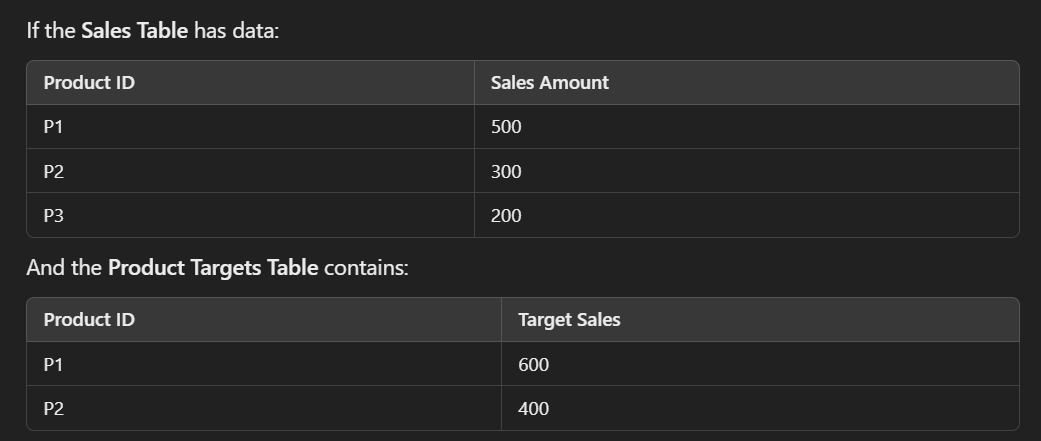

Then, the result of SalesForTargetProducts would be:

`500 (P1) + 300 (P2) = 800`

Product P3 is ignored because it's not in the Product Targets table.


In [ ]:
# If we also have Region in both tables, we can filter by Product ID and Region:

SalesForTargetProductsByRegion = 
CALCULATE(
    SUM(Sales[Sales Amount]),
    TREATAS(
        VALUES(ProductTargets[Product ID], ProductTargets[Region]), 
        Sales[Product ID], Sales[Region]
    )
)

# Now, sales will be filtered by both Product ID and Region, ensuring that only sales that match both conditions are included.

**✅ When to Use TREATAS?**
- ✔ When tables are not directly related, but you want to apply filters.
- ✔ When you need to transfer filters dynamically from one table to another.
- ✔ When working with disconnected tables in Power BI.



### INTERSECT
The INTERSECT function returns the common rows that exist in both tables.

**Syntax:** `INTERSECT(table1, table2)`

- table1 – The first table.
- table2 – The second table.
- Both tables must have the same number of columns and matching data types.

We have two tables:

- Online Sales Table (Sales from the online store)
- Retail Sales Table (Sales from physical stores)

In [ ]:
# We want to find customers who purchased from both channels
CommonCustomers = INTERSECT(OnlineSales, RetailSales)


### EXCEPT
The EXCEPT function returns rows that are in the first table but NOT in the second table.

**Syntax:** `EXCEPT(table1, table2)`

- table1 – The first table (source table).
- table2 – The second table (values to exclude).
- Both tables must have the same number of columns and matching data types

In [ ]:
# We want to find customers who only purchased online (not in retail stores).
OnlineOnlyCustomers = EXCEPT(OnlineSales, RetailSales)

- ✔ INTERSECT – When you need to find common values between two tables.
- ✔ EXCEPT – When you need to find differences between two tables.

### UNION
The UNION function in DAX combines two tables by appending their rows.

**Syntax:** `UNION(table1, table2)`

- table1 – The first table.
- table2 – The second table.
- Both tables must have the same number of columns and matching data types.

In [ ]:
# We want to combine both tables into a single list
AllCustomers = UNION(OnlineSales, RetailSales)


The UNION function does not remove duplicates.To remove duplicates, use `DISTINCT`:

In [ ]:
UniqueCustomers = DISTINCT(UNION(OnlineSales, RetailSales))

If table structures are different (i.e., different column names or data types), UNION will fail.

In [ ]:
UNION(
    SELECTCOLUMNS(OnlineSales, "Customer", [Customer ID]), 
    SELECTCOLUMNS(RetailSales, "Client", [Customer ID])
)
# SELECTCOLUMNS is used to rename columns so that both tables have the same structure.

### NATURALJOIN
The NATURALJOIN function joins two tables based on their common columns when a relationship exists between them in the model.

**Syntax:** `NATURALJOIN(table1, table2)`

- table1 – The first table.
- table2 – The second table.
- Both tables must share a common column and have an existing relationship in the data model.

The `Product ID` column is common between `OnlineSales` Table and `ProductDetails` Table, and they have a relationship in the Power BI model.

In [ ]:
SalesWithProducts = NATURALJOIN(OnlineSales, ProductDetails)


- Works only when a relationship exists between the tables.
- Automatically joins using the common column.
- Cannot be used for tables without a relationship.

### CROSSJOIN
The CROSSJOIN function returns all possible combinations of rows from two or more tables.

**Syntax:** `CROSSJOIN(table1, table2)`

- table1 – The first table.
- table2 – The second table.
- The function returns a Cartesian product, meaning each row in table1 is combined with each row in table2.

In [ ]:
# Creating All Possible Sales Combinations
CustomerProductCombos = CROSSJOIN(Customers, Products)


- No need for a relationship between tables.
- Returns every possible combination of rows.
- Can be useful for scenario modeling (e.g., simulating customer-product purchases).

# Date time operations

## Extracting date from date-time column

### Using DATEVALUE (Recommended)


In [ ]:
Date_Only = DATEVALUE('table'[DateTime])

# data type may be date-time so change it to date

### Using FORMAT (Returns Text)

In [ ]:
Date_Only_Text = FORMAT('table'[DateTime], "YYYY-MM-DD")
# data will be text so change it to date

### Using INT (Alternative Numeric Approach)
Since Power BI stores dates as numbers (where the integer part represents the date and the decimal part represents time), using INT removes the time component.

In [ ]:
Date_Only_int = INT('table'[DateTime])
# data will be whole number so change it to date

### using TRUNC

In [ ]:
DateOnly_trunc = TRUNC('table'[DateTime])
# change data type to date

## Extracting month from date-time column

### using MONTH

In [ ]:
Month_Number = MONTH('table'[DateTime]) # month number

### using FORMAT

In [ ]:
Month_Name = FORMAT('table'[DateTime], "MMMM") # month name

## Extracting day from date-time column

### using DAY

In [ ]:
Day_Number = DAY('table'[DateTime]) # day number

### using FORMAT

In [ ]:
Day_Name = FORMAT('table'[DateTime], "DDDD") # day name

## Extracting time from date-time column

### using FORMAT

In [ ]:
Time_Only = FORMAT('table'[DateTime], "HH:MM:SS")
# cahnge type to time

In [ ]:
AM_PM = FORMAT('table'[DateTime], "hh:mm:ss AM/PM")
# Example: 10:30:45 AM

# Important operations

## condtitonal formatting on chart

select the chart➜ go to `format visual`➜ select `color`(option may vary from different chart)➜ click on `conditional formating(icon)`➜ do the setting

## condtitonal formatting on matrix
select the matrix➜ go to `build visual`➜ go to `values` field(present below rows and columns filed)➜ click on drop down icon of column name➜ click on `condtional formatting`➜ do the setting

## page navigator button
click on `insert`➜ click on `buttons`➜ select `navigator`➜ select `page navigator`

## dynamic title based on measure selected

1. Create a measure: `Dynamic Title = SWITCH(VALUES('Calculation Method'[Calc Method]),"Average","Key Indicators - Patient Wait List (Average)","Median","Key Indicators - Patient Wait List (Median)") `
2. select `card` and use this `Dynamic Title`

## handling blank data value and blank chart

Suppose we select some value from slicer let's say we have selected a date for which we don't have avg waittime. In this case we see `blank` as value which is not good. Instead we want to display 0 as value. For this we add `+ 0` in our measure: `Wait List = CALCULATE(SUM(All_Data[Total]),All_Data[Archive_Date]= EDATE(MAX(All_Data[Archive_Date]),-12)) + 0`

For chart, we see empty image which is not good. Instead we want to display message like "No data for selected criteria" and for this we have to follow these steps:
1. create measure: `NoDataLeft = IF(ISBLANK(CALCULATE(SUM(All_Data[Total]),All_Data[Case_Type]<>"Outpatient")),"No data for selected criteria","") `
2. for display message use above measure in `card`
3. palce this card at postion of chart
4. ensure this card is at background so that it is displayed only when chart is not present due to not no data. To so follow these **steps:** select card➜ goto `view` tab➜  click on `selection`➜ now in `selection` pane, move the card below the chart by dragging

## interactivity
When we select some value from slicer then all charts is get filtered. We have a chart and what we want is when select some value from slicer, this chart should get filter on other words we want charts should affected by that slicer. For this we have to follow these steps:
1. select that slicer you want to change interactivity
2. click on `format` tab ➜ click on `edit interaction`
3. now click on `None`(icon) of chart that you want off interactivity with that selcted slicer

## adding button and its action
1. **Inserting button:** click on `insert` tab➜ click on `button`➜ select desired button➜ now place this button at you desired location
2. **Adding action to button:** select the button that you inserted(in above step)➜ now in `format button` pane select `button`(by default selected)➜ turn ON `action`➜ now from `action` dropdown select the `type`➜ now select `destination`(you can choose other page as well)
3. **Hover on button:** after 2nd step➜ select `tooltip` ON➜ now in `text` filed write the text you want to display when user hover on button 

## custom tooltip chart
1. create a new page and create the charts and data you want to display as tooltip and format this page(change size of page using `canvas setting` present in `format page`)
2. Now to goto `format page` (present in `visualization` pane)➜ goto `information page`➜ turn ON `allow use as tooltip`
3. Now goto you dashboard page➜ select the chart for which you want to use custom tooltip➜ goto to `format visual`(present visualization pane)➜ goto `general`➜ goto `tooltip`➜ keep `type` as `Report Page`➜ now in `page` select the page that we create in 1st step for using it as tooltip.
4. Now hide page from by right click on that page